In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
path = r'D:\photos\robomaster_photo\1.jpg'
img = cv2.imread(path, 1)
gray_img = cv2.imread(path ,0)

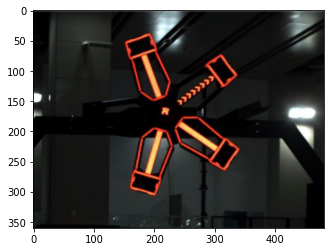

In [3]:
b, g, r = cv2.split(img)
plt.imshow(cv2.merge([r, g, b]))
#plt默认以r,g,b三通道显示图像，而cv2会按b,g,r通道顺序读取图像
#加入参数cmap = 'gray'后可以显示灰度图像

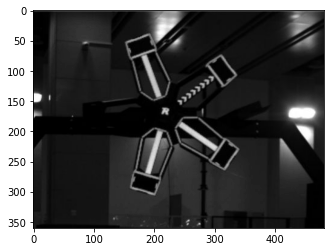

In [4]:
plt.imshow(gray_img, cmap='gray')

#### 采用红色通道与蓝色的差作为前处理图像（这样可以反映红的深度，从而去除无用信息），然后阈值化为二值图片。

In [5]:
import numpy as np

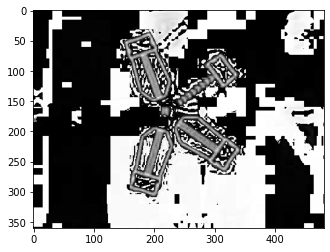

In [6]:
#red_img = np.zeros_like(gray_img, dtype=gray_img.dtype)
red_img = r - b
plt.imshow(red_img, cmap='gray')

100.0

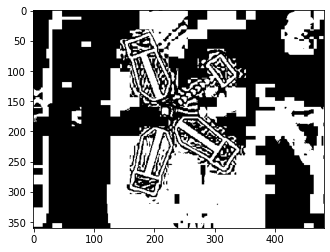

In [7]:
ret, image = cv2.threshold(red_img, 100, 255, cv2.THRESH_BINARY)
plt.imshow(image, cmap='gray')
ret

### RGB图像转成HSV 提取红色部分
cv2.inRange(hsv, lower, upper)<br/>
hsv指的是原图<br/>
lower指的是图像中低于lower的值，图像值变为0<br/>
upper指的是图像中高于upper的值，图像值变为0<br/>
而在lower_red～upper_red之间的值变成255

opencv 的H范围是0~180，红色的H范围大概是 (0~8)∪(160,180) ，S是饱和度，
一般是大于一个值,S过低就是灰色(参考值S>80)，V是亮度，过低就是黑色
，过高就是白色(参考值220>V>50)

(360, 481)


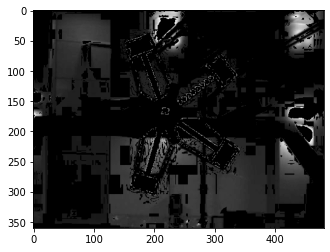

In [8]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
#hls = cv2.cvtColor(r, cv2.COLOR_BGR2HLS)
lower_red = np.array([20, 20, 20])
upper_red = np.array([200, 200, 200])
mask = cv2.inRange(hsv, lower_red, upper_red)
print(mask.shape)
hsv_red = cv2.bitwise_and(gray_img, mask)
plt.imshow(hsv_red, cmap='gray')

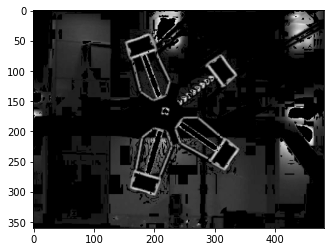

In [9]:
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
rows, cols, channels = img.shape
# 区间1
lower_red = np.array([0, 43, 46])
upper_red = np.array([10, 255, 255])
mask0 = cv2.inRange(img_hsv,lower_red,upper_red)
# 区间2
lower_red = np.array([156, 43, 46])
upper_red = np.array([180, 255, 255])
mask1 = cv2.inRange(img_hsv,lower_red,upper_red)
# 拼接两个区间
mask = mask0 + mask
hsv_red = cv2.bitwise_and(gray_img, mask)
plt.imshow(hsv_red, cmap='gray')

print(img.shape[:2])
pix = img
width, height = img.shape[:2]
def rgb2hsv(r, g, b):
    '''rgb转hsv'''
    r, g, b = r/255.0, g/255.0, b/255.0
    mx = max(r, g, b)
    mn = min(r, g, b)
    df = mx-mn
    if mx == mn:
        h = 0
    elif mx == r:
        h = (60 * ((g-b)/df) + 360) % 360
    elif mx == g:
        h = (60 * ((b-r)/df) + 120) % 360
    elif mx == b:
        h = (60 * ((r-g)/df) + 240) % 360
    if mx == 0:
        s = 0
    else:
        s = df/mx
    v = mx
    H = h / 2
    S = s * 255.0
    V = v * 255.0
    return H, S, V
for x in range(width):
    for y in range(height):
        r, g, b = pix[x, y]
        h,s,v = rgb2hsv(r,g,b)
        if 0 < h < 10 or 156 < h < 180:
            pix[x, y] = 0,0,0
        else:
            pix[x, y] = 255,255,255
plt.imshow(pix)

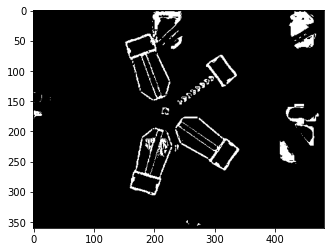

In [10]:
bin_img = cv2.threshold(hsv_red, 80, 255, cv2.THRESH_BINARY)[1]
plt.imshow(bin_img, cmap='gray')

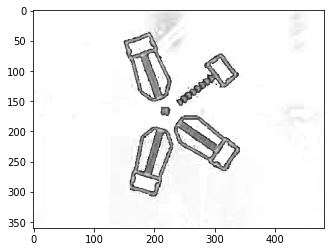

In [11]:
width, height = red_img.shape
for x in range(width):
    for y in range(height):
        if red_img[x, y] < 30:
            red_img[x, y] = 255
plt.imshow(red_img, cmap='gray')

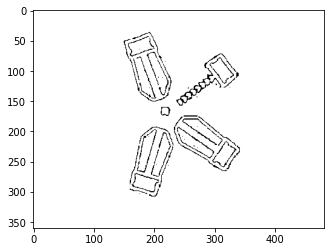

In [12]:
bin_img2 = cv2.threshold(red_img, 100, 255, cv2.THRESH_BINARY)[1]
plt.imshow(bin_img2, cmap='gray')

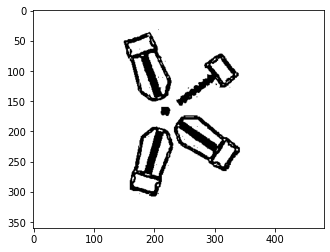

In [13]:
bin_img2 = cv2.threshold(red_img, 200, 255, cv2.THRESH_BINARY)[1]
plt.imshow(bin_img2, cmap='gray')

### 阈值设为100时成中空的状态，200左右为实心

cv2.dilate(src, kernel, iteration)

参数说明: src表示输入的图片， kernel表示方框的大小， iteration表示迭代的次数

膨胀操作原理：存在一个kernel，在图像上进行从左到右，从上到下的平移，如果方框中存在白色，那么这个方框内所有的颜色都是白色

<b>erode黑色膨胀，白色腐蚀 dilate相反</b>

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x20c67af69e8>)

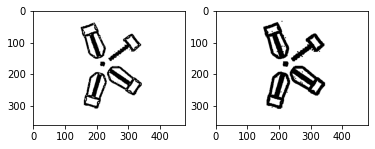

In [14]:
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(bin_img2,kernel,iterations=1)
plt.subplot(1,2,1),plt.imshow(bin_img2,'gray')
plt.subplot(1,2,2),plt.imshow(erosion,'gray')

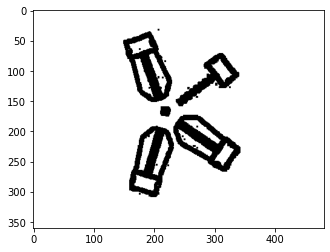

In [15]:
plt.imshow(erosion,'gray')

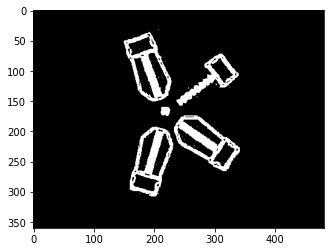

In [16]:
#反转颜色,用的是阈值200的图
width, height = bin_img2.shape
for x in range(width):
    for y in range(height):
        if bin_img2[x, y] >180:
            bin_img2[x, y] = 0
        else:
            bin_img2[x, y] = 255
plt.imshow(bin_img2, cmap='gray')

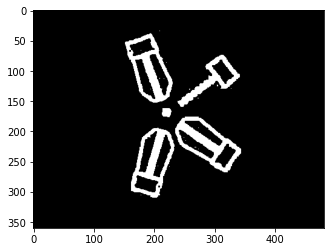

In [17]:
#对其中白色部分先膨胀，再腐蚀，去除内部噪声
kernel = np.ones((2,2),np.uint8)
dilation = cv2.dilate(bin_img2,kernel,iterations=2)
erosion = cv2.erode(dilation, kernel, iterations=2)
plt.imshow(erosion,'gray')

### 漫水填充（floodFill）
floodFill(image, mask, seedPoint, newVal, loDiff=None, upDiff=None, flags=None)

Iimage:输入图像，可以是一通道或者是三通道。

mask:该版本特有的掩膜。 单通道，8位，在长宽上都比原图像image多2个像素点。
另外，当flag为FLOORFILL_MAK_ONLY时，只会填充mask中数值为0的区域。

seedPoint:漫水填充的种子点，即起始点。

newVal:被填充的像素点新的像素值

loDiff：表示当前的观察点像素值与其相邻区域像素值或待加入该区域的像素之间的亮度或颜色之间负差的最大值。

upDiff:表示当前的观察点像素值与其相邻区域像素值或待加入该区域的像素之间的亮度或颜色之间负差的最小值。

flag：
当为CV_FLOODFILL_FIXED_RANGE 时，待处理的像素点与种子点作比较，在范围之内，则填充此像素 。（改变图像）

CV_FLOODFILL_MASK_ONLY 此位设置填充的对像， 若设置此位，则mask不能为空，此时，函数不填充原始图像img，而是填充掩码图像.

360 481


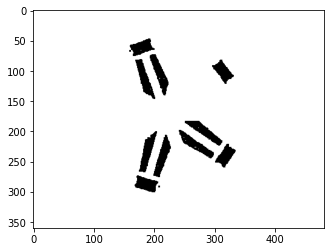

In [18]:
h, w = erosion.shape
print(h, w)
mask = np.zeros([h+2, w+2], np.uint8)
im = erosion.copy()
cv2.floodFill(im, mask, (30, 30), 255, 10, 10, #5，6两个参数的值无影响
#根据种子点比较，这里（30，30）点为黑（0）,第4个填255则内部空心和
#外部背景黑白翻转，传0则与原图相同
#漫水填充，简单地说，就是自动选中与种子点相连的区域，然后将该区域替换成指定的颜色
              cv2.FLOODFILL_FIXED_RANGE)
plt.imshow(im,'gray')

中值滤波是基于排序统计理论的一种能有效抑制噪声的非线性信号处理技术。它也是一种邻域运算，类似于卷积，但是计算的不是加权求和，而是把数字图像或数字序列中一点的值用该点的一个邻域中各点值的中值代替，让周围像素灰度值的差比较大的像素改取与周围的像素值接近的值，从而可以消除孤立的噪声点
void medianBlur(Mat src, Mat dst, int ksize)

○src：源图像Mat对象

○dst：目标图像Mat对象

○ksize：滤波模板的尺寸大小，必须是大于1的奇数，如：3，5，7...

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x20c67dc5a58>)

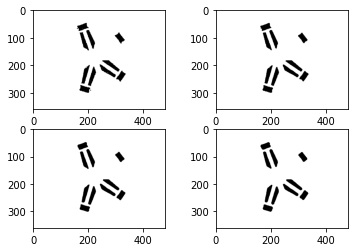

In [19]:
im2 = cv2.medianBlur(im, 5)
im3 = cv2.medianBlur(im, 7)
im4 = cv2.medianBlur(im, 9)
plt.subplot(2,2,1), plt.imshow(im,'gray')
plt.subplot(2,2,2), plt.imshow(im2,'gray')
plt.subplot(2,2,3), plt.imshow(im3,'gray')
plt.subplot(2,2,4), plt.imshow(im4,'gray')

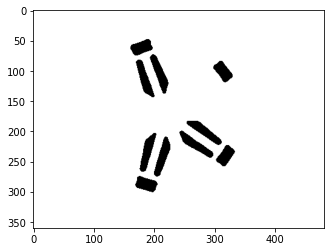

In [20]:
plt.imshow(im4,'gray')
#ksize取7，9时效果较好

### 边缘检测
edge = cv2.Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient ]]])

image：源图像

threshold1：阈值1

threshold2：阈值2

apertureSize：可选参数，Sobel算子的大小

其中，较大的阈值2用于检测图像中明显的边缘，但一般情况下检测的效果不会那么完美，边缘检测出来是断断续续的。所以这时候用较小的第一个阈值用于将这些间断的边缘连接起来。
函数返回的是二值图，包含检测出的边缘

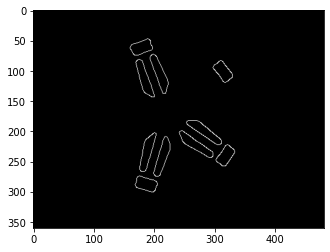

In [21]:
edge = cv2.Canny(im4, 0, 255) #后两参数无影响
plt.imshow(edge,'gray')

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


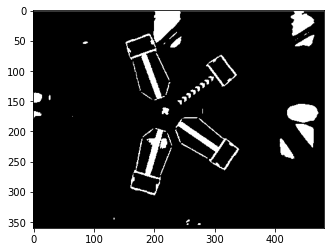

In [22]:
#通过np.where进行二值化，满足条件像素点置为255（白），否则值为0，并进行广播
np_bin_img = np.where(gray_img > 100, 255, 0)
print(np_bin_img)
plt.imshow(np_bin_img, cmap='gray');

### 检测矩形并提取坐标需要对图像进行预处理、边缘检测、提取轮廓、检测凸包、角点检测。

cv2.findContours(image, mode, method, contours=None, 
                 hierarchy=None, offset=None)
                 
<b>image</b> 代表输入的图片。注意输入的图片必须为二值图片。若输入的图片为彩色图片，必须先进行灰度化和二值化。

<b>mode</b>  表示轮廓的检索模式，有4种：

`cv2.RETR_EXTERNAL`  表示只检测外轮廓。

`cv2.RETR_LIST`  检测的轮廓不建立等级关系。

`cv2.RETR_CCOMP`  建立两个等级的轮廓，上面的一层为外边界，里面的一层为内孔的边界信息。如果内孔内还有一                   个连通物体，这个物体的边界也在顶层。

`cv2.RETR_TREE`  建立一个等级树结构的轮廓。

<b>method</b>  为轮廓的近似办法，有4种：

`cv2.CHAIN_APPROX_NONE`  存储所有的轮廓点，相邻的两个点的像素位置差不超过1，即max（abs（x1-x2），                       abs（y2-y1））<=1。

`cv2.CHAIN_APPROX_SIMPLE`  压缩水平方向，垂直方向，对角线方向的元素，只保留该方向的终点坐标，例如一个                   矩形轮廓只需4个点来保存轮廓信息。

`cv2.CHAIN_APPROX_TC89_L1` 和 `cv2.CHAIN_APPROX_TC89_KCOS`使用teh-Chinl chain 近似算法。

#### 返回值：
cv2.findContours()函数返回两个值，一个是轮廓本身contours，还有一个是每条轮廓对应的属性hierarchy。

contours:

cv2.findContours()函数首先返回一个list，list中每个元素都是图像中的一个轮廓信息，list中每个元素(轮廓信息)类型为ndarray。len(contours[1]) 表示第一个轮廓储存的元素个数，即该轮廓中储存的点的个数。本例第一个轮廓为矩形，轮廓中有4个点，这是因为当参数mode 设置成： cv2.CHAIN_APPROX_SIMPLE ，轮廓中并不是存储轮廓上所有的点，而是只存储可以用直线描述轮廓的点的个数，比如一个“正立”的矩形，只需4个顶点就能描述轮廓了

In [23]:
contours,hierarchy = cv2.findContours(edge, 
                            cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print(np.size(contours))
print(len(contours[1]))
print(contours[0][:5])

20
52
[[[176 273]]

 [[175 274]]

 [[174 274]]

 [[173 275]]

 [[172 275]]]


D:\software\anaconda\envs\deep_learning\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


cv2.drawContours()

cv2.drawContours(image, contours, contourIdx, color, thickness=None, lineType=None, hierarchy=None, maxLevel=None, offset=None)

第一个参数是指明在哪幅图像上绘制轮廓；image为三通道才能显示轮廓

第二个参数是轮廓本身，在Python中是一个list;

第三个参数指定绘制轮廓list中的哪条轮廓，如果是-1，则绘制其中的所有轮廓。后面的参数很简单。其中thickness表明轮廓线的宽度，如果是-1（cv2.FILLED），则为填充模式。contourIdx为负数时画出所有轮廓

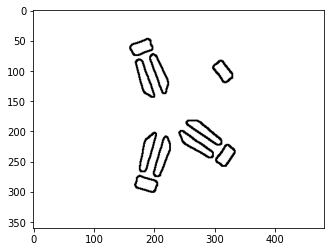

In [24]:
white_canvas = np.ones([edge.shape[0], edge.shape[1], 3], 
                       dtype=np.uint8)*255
#from time import sleep
#反复调用drawContours将轮廓画出，或直接第三个参数设为-1
#for i in range(len(contours)):
cv2.drawContours(white_canvas, contours, -1, 0, 2)
plt.imshow(white_canvas)

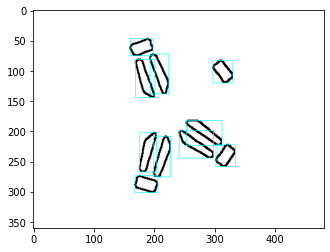

In [25]:
for i in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[i]) 
    #只能获取包围对象的 垂直 矩形
    #返回四个值，分别是x，y，w，h；
    #x，y是矩阵左上点的坐标，w，h是矩阵的宽和高
    cv2.rectangle(white_canvas, (x, y), (x + w, y + h), (0, 255, 255), 1)
plt.imshow(white_canvas)

double arcLength(InputArray curve, bool closed)；返回曲线长度

curve：输入二维点集，并用std::vector or Mat存储；

closed：该标志指明曲线是否封闭；

In [26]:
length_list = []
for i in range(len(contours)):
    length_list.append(int(cv2.arcLength(contours[i], True)))
print(length_list)

[108, 106, 103, 100, 159, 157, 157, 155, 158, 156, 154, 152, 105, 103, 157, 155, 159, 157, 107, 105]


In [27]:
#通过取平均数的方式去掉大的轮廓
len_list = np.array(length_list)
average = np.mean(len_list)
print(average)
index_list = np.where(len_list < average) #输出索引数组
len_list[np.where(len_list < average)]

135.65


array([108, 106, 103, 100, 105, 103, 107, 105])

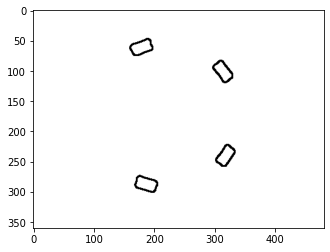

In [28]:
white_canvas2 = np.ones([edge.shape[0], edge.shape[1], 3], 
                       dtype=np.uint8)*255
for i in index_list[0]:
    cv2.drawContours(white_canvas2, contours, i, 0, 2)
plt.imshow(white_canvas2)

cv.approxPolyDP(curve, spsilon, closed) 的参数1是源图像的某个轮廓；
 
参数2(epsilon)是一个距离值，表示多边形的轮廓接近实际轮廓的程度，值越小，越精确；
 
参数3表示是否闭合

多边形包围轮廓，本例获得矩形，返回检测出矩形的四个角的坐标

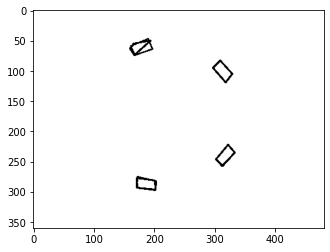

In [46]:
white_canvas3 = np.ones([edge.shape[0], edge.shape[1], 3], 
                       dtype=np.uint8)*255
for i in index_list[0]:
    appro = cv2.approxPolyDP(contours[i], 5, closed=True)
    for j in range(4):
        #np数组两种切片方式都可
        #print(appro[j][0])
        cv2.line(white_canvas3, tuple(appro[j, 0]), 
                tuple(appro[(j+1) % 4, 0]), (0,0,0), 2)
plt.imshow(white_canvas3)

In [30]:
appro_list = []
for i in index_list[0]:
    appro_list.append(cv2.approxPolyDP(contours[i], 5, closed=True))
len(appro_list)

8

In [47]:
sum_list = []
for arr in appro_list:
    if not arr.size == 8:
        appro_list.remove(arr)
        continue
    else:
        sum_list.append(np.sum(arr.ravel()))
        #ravel将矩阵flat成一维，bp.sum加和
sum_list

[1895, 1893, 2229, 2230, 1655, 1655, 960]

In [48]:
"""对相邻的矩形去重"""
sum_list2:list = list(sum_list) 
#列表赋值为浅复制（引用），用list构造新列表进行deep copy
appro_list2 = []
#for range循环中不要对自身进行修改，防止下标过界等，便想到用while循环
while sum_list: #列表不为空，取最后一个元素
    check_num = sum_list.pop()
    for num in sum_list:
        if abs(check_num - num) < 5: #阈值设为5
            sum_list.remove(num) #去除列表所有与check_num相近的值
    #将check_num对应元素（通过下标获得）放到新列表中
    print(sum_list2, sum_list)
    appro_list2.append(appro_list[sum_list2.index(check_num)])
len(appro_list2)

[1895, 1893, 2229, 2230, 1655, 1655, 960] [1895, 1893, 2229, 2230, 1655, 1655]
[1895, 1893, 2229, 2230, 1655, 1655, 960] [1895, 1893, 2229, 2230]
[1895, 1893, 2229, 2230, 1655, 1655, 960] [1895, 1893]
[1895, 1893, 2229, 2230, 1655, 1655, 960] []


4

4


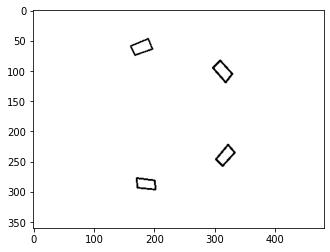

In [49]:
white_canvas4 = np.ones([edge.shape[0], edge.shape[1], 3], 
                       dtype=np.uint8)*255
print(len(appro_list2))
for appro in appro_list2:
    for j in range(4):
        #np数组两种切片方式都可
        #print(appro[j][0])
        #通过画线方式来绘制矩形
        cv2.line(white_canvas4, tuple(appro[j, 0]), 
                tuple(appro[(j+1) % 4, 0]), (0,0,0), 2)
plt.imshow(white_canvas4)